In [2]:
!pip install sentence_transformers

## Load corpus

In [3]:
from globals import CORPUS_PATH
from utils import load_corpus

In [4]:
corpus = load_corpus(CORPUS_PATH)
corpus[:1]

[{'id': 1,
  'category': 'business',
  'content': 'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the

# Semantic BERT embeddings 
https://www.sbert.net/docs/pretrained_models.html

In [5]:
from sentence_transformers import SentenceTransformer, util
from models import Corpus, Result
from utils import print_resuts

class EmbeddingModel():
    def __init__(self, model_name, corpus:Corpus):
        self.model = SentenceTransformer(model_name)
        self.corpus = corpus
        self.document_embeddings = self.model.encode([doc["content"] for doc in self.corpus])

    def launch_query(self, query, k=5):
        query_embedding = self.model.encode(query)
        cos_sim_scores = util.cos_sim(query_embedding, self.document_embeddings).tolist()[0]
        results = [ Result(id=i, content=doc["content"], category= doc["category"], score=cos_sim_scores[i] ) 
                   for i, doc in enumerate(self.corpus) ]
        
        sorted_results = sorted(results, key=lambda x: x.score, reverse=True)

        print_resuts(sorted_results[:k])

        return sorted_results
    

In [6]:
model = EmbeddingModel(model_name='all-mpnet-base-v2', corpus=corpus)

In [7]:
results = model.launch_query("business")

 1. [ Score = 0.350 ] Category politics |  ID: 1422 | Text: uk firms  embracing e-commerce  uk firms are embra
 2. [ Score = 0.336 ] Category business |  ID: 184 | Text: businesses fail to plan for hiv companies fail to 
 3. [ Score = 0.317 ] Category sport |  ID: 1870 | Text: cebit fever takes over hanover thousands of produc
 4. [ Score = 0.315 ] Category business |  ID: 1366 | Text: business fears over sluggish eu economy as europea
 5. [ Score = 0.312 ] Category tech |  ID: 2151 | Text: small firms  hit by rising costs  rising fuel and 


In [8]:
results[0]

Result(id=1422, content='uk firms  embracing e-commerce  uk firms are embracing internet trading opportunities as never before  e-commerce minister mike o brien says.  a government-commissioned study ranked the uk third in its world index of use of information and communication technology (ict). the report suggests 69% of uk firms are now using broadband and that 30% of micro businesses are trading online. mr o brien said uk businesses were sprinting forward in ict use  but that there were more challenges ahead. the report  carried out independently by consultants booz allen hamilton and hi europe  placed the uk third behind sweden and ireland for business use of ict.  it showed british business brought greater maturity to their ict use  by using broadband in increased numbers  bringing ict into their business plans and using new technologies such as voice activated programmes and desktop video conferences. mr o brien said:  the increase in the proportion of business connected by broad

In [9]:
print(len(results))

2225


# Evaluation

In [10]:
from evaltools import evaluate
from utils import process_results
from models import Query

In [11]:
method= 'prec_rec' 

In [12]:
categories = ['politics', 'entertainment', 'sport', 'tech', 'business']

In [13]:
method_1 = 'prec_rec' 
method_2 = 'r-prec'
method_3 = 'map'

In [14]:
queries_normal = [ Query(category=c, content=c) for c in categories]
queries_normal

[Query(category='politics', content='politics'),
 Query(category='entertainment', content='entertainment'),
 Query(category='sport', content='sport'),
 Query(category='tech', content='tech'),
 Query(category='business', content='business')]

Query 1: category='politics' content='politics'


 1. [ Score = 0.464 ] Category politics |  ID: 514 | Text: how political squabbles snowball it s become commo
 2. [ Score = 0.415 ] Category sport |  ID: 1800 | Text: teens  know little  of politics teenagers question
 3. [ Score = 0.405 ] Category tech |  ID: 981 | Text: online games play with politics after bubbling und
 4. [ Score = 0.389 ] Category business |  ID: 1119 | Text: iraqi voters turn to economic issues beyond the de
 5. [ Score = 0.389 ] Category politics |  ID: 671 | Text: uk youth  interested  in politics the majority of 
-----
Query 2: category='entertainment' content='entertainment'
 1. [ Score = 0.335 ] Category tech |  ID: 981 | Text: online games play with politics after bubbling und
 2. [ Score = 0.330 ] Category entertainment |  ID: 2048 | Text: games  deserve a place in class  computer games co
 3. [ Score = 0.317 ] Category tech |  ID: 1631 | Text: mobile picture power in your pocket how many times
 4. [ Score = 0.314 ] Category entertainment |  ID: 618 | Text

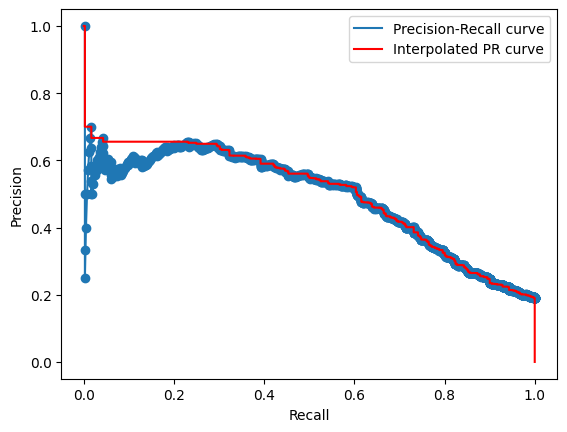

	Query 2


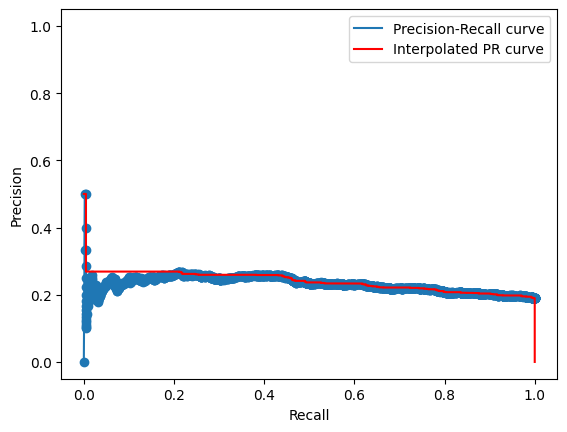

	Query 3


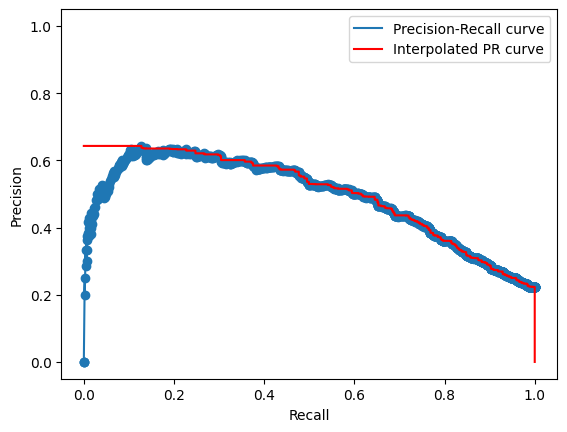

	Query 4


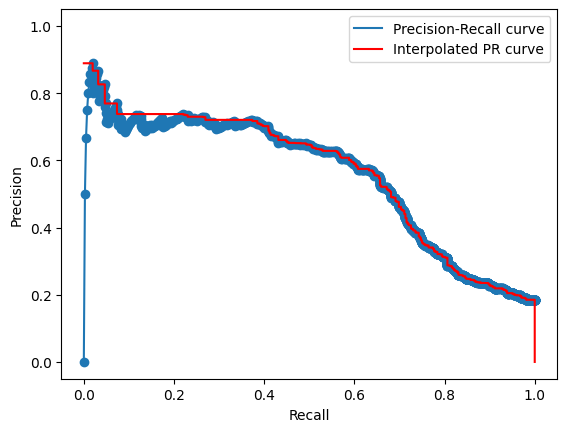

	Query 5


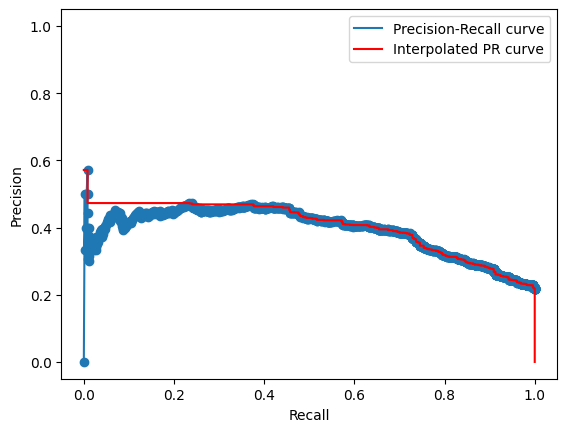

In [15]:
results, relevances = process_results(model, queries_normal)
evaluate(method_1, results, relevances)

method='prec_rec' 
evaluate(method,Q,R)

In [16]:
print("Method:", method_2)
evaluate(method_2, results, relevances, False)
print("Method:", method_3)
evaluate(method_3, results, relevances, False)

Method: r-prec

 Determine R-precision for each query
	Query 1
		Number of relevant documents: 421 --> P(421)=0.54
	Query 2
		Number of relevant documents: 420 --> P(420)=0.26
	Query 3
		Number of relevant documents: 493 --> P(493)=0.52
	Query 4
		Number of relevant documents: 408 --> P(408)=0.60
	Query 5
		Number of relevant documents: 483 --> P(483)=0.46
Method: map

 Calculate the Mean Average Precision
	Query 1
		AP=1/421 {P(1) + P(5) + P(6) + P(7) + P(8) + P(9) + P(10) + P(15) + P(17) + P(18) + P(19) + P(20) + P(22) + P(23) + P(24) + P(25) + P(26) + P(27) + P(32) + P(34) + P(36) + P(37) + P(38) + P(41) + P(42) + P(47) + P(48) + P(50) + P(51) + P(53) + P(54) + P(57) + P(58) + P(59) + P(61) + P(64) + P(65) + P(66) + P(67) + P(68) + P(69) + P(71) + P(72) + P(73) + P(74) + P(75) + P(77) + P(79) + P(82) + P(83) + P(85) + P(87) + P(88) + P(90) + P(94) + P(95) + P(97) + P(98) + P(100) + P(101) + P(102) + P(103) + P(104) + P(105) + P(106) + P(107) + P(108) + P(109) + P(112) + P(113) + P(1

# Queries with def

In [17]:
import json

from globals import DEF_PATH

with open(DEF_PATH) as f:
    defs = json.load(f)

In [18]:
defs

{'politics': 'Politics include topics related to government, political parties, elections, policies, and political figures, commentary, and reporting on political developments at local, national, and international levels.',
 'entertainment': 'Entertainment encompasses topics related  to movies, television shows, music, theater, celebrity gossip, and cultural events. It includes reviews, interviews, previews, and news related to the entertainment industry.',
 'sport': 'Sport covers various athletic activities, competitions, and events. It includes coverage of popular sports such as football, basketball, soccer, baseball, tennis, and more. This category provides updates, scores, analysis, and commentary on sports news and events.',
 'tech': 'Tech focuses on technology-related news, innovations, gadgets, software, and digital trends. It covers topics such as smartphones, computers, artificial intelligence, cybersecurity, internet culture, and emerging technologies.',
 'business': 'Busines

In [19]:
queries_defs = [Query(category=c, content=defs[c]) for c in categories]
queries_defs

[Query(category='politics', content='Politics include topics related to government, political parties, elections, policies, and political figures, commentary, and reporting on political developments at local, national, and international levels.'),
 Query(category='entertainment', content='Entertainment encompasses topics related  to movies, television shows, music, theater, celebrity gossip, and cultural events. It includes reviews, interviews, previews, and news related to the entertainment industry.'),
 Query(category='sport', content='Sport covers various athletic activities, competitions, and events. It includes coverage of popular sports such as football, basketball, soccer, baseball, tennis, and more. This category provides updates, scores, analysis, and commentary on sports news and events.'),
 Query(category='tech', content='Tech focuses on technology-related news, innovations, gadgets, software, and digital trends. It covers topics such as smartphones, computers, artificial in

Query 1: category='politics' content='Politics include topics related to government, political parties, elections, policies, and political figures, commentary, and reporting on political developments at local, national, and international levels.'


 1. [ Score = 0.472 ] Category tech |  ID: 981 | Text: online games play with politics after bubbling und
 2. [ Score = 0.417 ] Category tech |  ID: 1316 | Text: blogs take on the mainstream web logs or blogs are
 3. [ Score = 0.413 ] Category sport |  ID: 1800 | Text: teens  know little  of politics teenagers question
 4. [ Score = 0.399 ] Category politics |  ID: 671 | Text: uk youth  interested  in politics the majority of 
 5. [ Score = 0.375 ] Category tech |  ID: 1076 | Text: blog reading explodes in america americans are bec
-----
Query 2: category='entertainment' content='Entertainment encompasses topics related  to movies, television shows, music, theater, celebrity gossip, and cultural events. It includes reviews, interviews, previews, and news related to the entertainment industry.'
 1. [ Score = 0.364 ] Category sport |  ID: 1575 | Text: us  afflicted  with awards fatigue the film world 
 2. [ Score = 0.350 ] Category entertainment |  ID: 618 | Text: campaigners attack mtv 

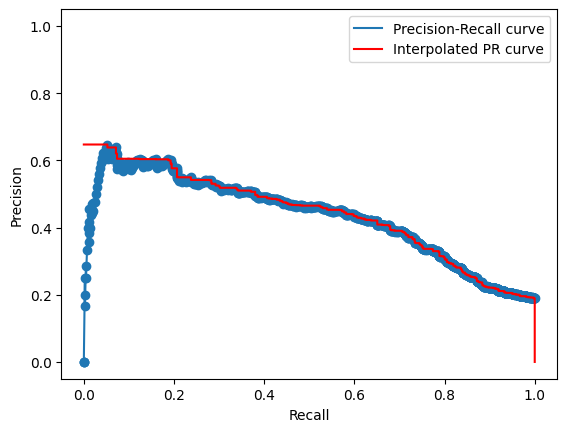

	Query 2


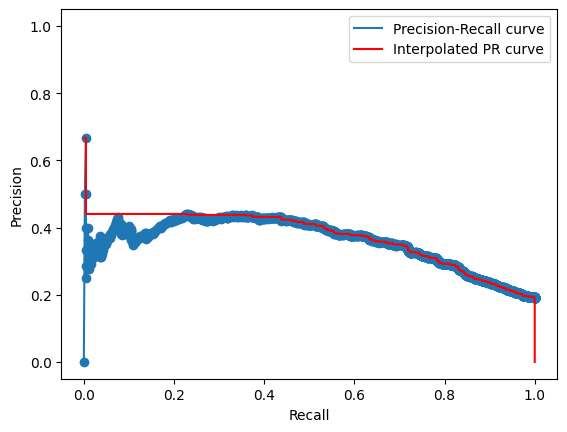

	Query 3


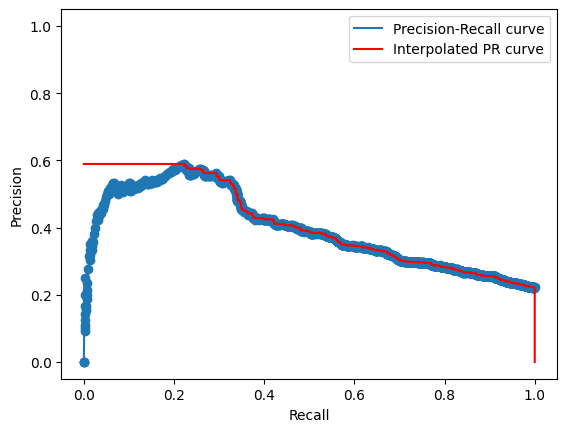

	Query 4


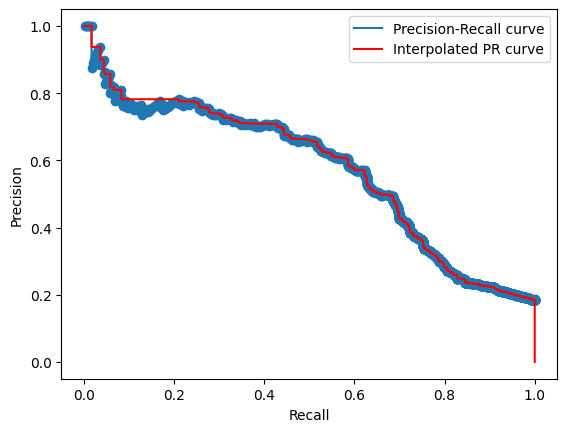

	Query 5


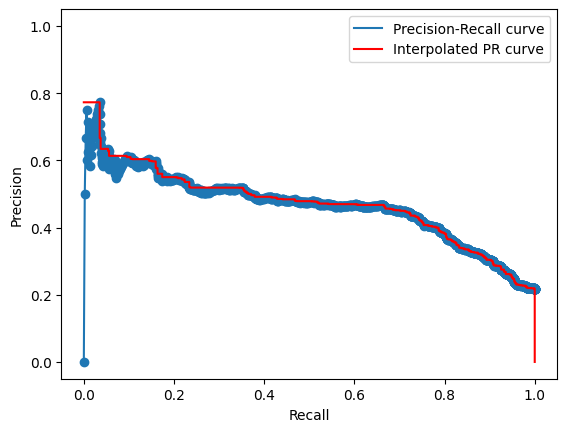

In [20]:
results, relevances = process_results(model, queries_defs)
evaluate(method_1, results, relevances)

In [21]:
print("Method:", method_2)
evaluate(method_2, results, relevances, False)
print("Method:", method_3)
evaluate(method_3, results, relevances, False)

Method: r-prec



 Determine R-precision for each query
	Query 1
		Number of relevant documents: 421 --> P(421)=0.47
	Query 2
		Number of relevant documents: 420 --> P(420)=0.43
	Query 3
		Number of relevant documents: 493 --> P(493)=0.42
	Query 4
		Number of relevant documents: 408 --> P(408)=0.59
	Query 5
		Number of relevant documents: 483 --> P(483)=0.48
Method: map

 Calculate the Mean Average Precision
	Query 1
		AP=1/421 {P(4) + P(7) + P(9) + P(10) + P(11) + P(15) + P(16) + P(17) + P(19) + P(21) + P(22) + P(23) + P(24) + P(25) + P(26) + P(27) + P(28) + P(29) + P(31) + P(32) + P(33) + P(34) + P(37) + P(39) + P(40) + P(41) + P(44) + P(45) + P(46) + P(47) + P(50) + P(55) + P(56) + P(58) + P(59) + P(61) + P(64) + P(66) + P(67) + P(68) + P(69) + P(72) + P(74) + P(75) + P(78) + P(79) + P(80) + P(81) + P(82) + P(83) + P(85) + P(86) + P(88) + P(90) + P(92) + P(96) + P(97) + P(98) + P(100) + P(102) + P(104) + P(105) + P(106) + P(107) + P(108) + P(110) + P(111) + P(115) + P(119) + P(120) + P(121) + P(122)

# Queries with max word

In [22]:
from globals import WORDS_PATH

with open(WORDS_PATH) as f:
    max_words = json.load(f)

In [23]:
queries_max = [ Query(category=c, content=" ".join(max_words[c])) for c in categories]
queries_max

[Query(category='politics', content='us ter fig pay britain howard wint afric back miliband campbel digit santin mus pow fry william elect issu galloway airlin min club right council roch court off lord drink deal domain prim would said wag search appoint sit star duty show 000 fin muslim pend palestin thanou eu kilroy-silk film book bord lse fraud hunt referend turkey gam microsoft mcal childr blunket fish famy cag kirw scrushy trust budget heal hagu immigr pric print wal id text behavio duchy review deport balco oper independ stud inform wom fed lindsay baa blackpool deb jowel tobacco osc campaign forens law collin buy valu scot robot arrest appl bil mr lion iaaf houston liverpool car sainsbury men tax espn soc kashmir bry sport ukip evid benefit barcelon mcclaren airport cunningham regy vot fiat schools osbourn work dvd uk real rac govern casino blair kennedy lvmh spur labo cel busy movy col new clim jamieson brit nuclear e-university edward jet ballot resign lib scotland serv ba bo

Query 1: category='politics' content='us ter fig pay britain howard wint afric back miliband campbel digit santin mus pow fry william elect issu galloway airlin min club right council roch court off lord drink deal domain prim would said wag search appoint sit star duty show 000 fin muslim pend palestin thanou eu kilroy-silk film book bord lse fraud hunt referend turkey gam microsoft mcal childr blunket fish famy cag kirw scrushy trust budget heal hagu immigr pric print wal id text behavio duchy review deport balco oper independ stud inform wom fed lindsay baa blackpool deb jowel tobacco osc campaign forens law collin buy valu scot robot arrest appl bil mr lion iaaf houston liverpool car sainsbury men tax espn soc kashmir bry sport ukip evid benefit barcelon mcclaren airport cunningham regy vot fiat schools osbourn work dvd uk real rac govern casino blair kennedy lvmh spur labo cel busy movy col new clim jamieson brit nuclear e-university edward jet ballot resign lib scotland serv ba b

 1. [ Score = 0.473 ] Category tech |  ID: 854 | Text: bbc web search aids odd queries the bbc s online s
 2. [ Score = 0.406 ] Category business |  ID: 1567 | Text: voters flock to blog awards site voting is under w
 3. [ Score = 0.400 ] Category tech |  ID: 587 | Text: blog  picked as word of the year the term  blog  h
 4. [ Score = 0.371 ] Category politics |  ID: 1038 | Text: tories unveil quango blitz plans plans to abolish 
 5. [ Score = 0.370 ] Category tech |  ID: 550 | Text: junk e-mails on relentless rise spam traffic is up
-----
Query 2: category='entertainment' content='us ter the delt ban studio industry chart mus hil lov william interact key issu trad paul aguiler scoggin fightst da bob alb pat lord drink year eminem visit said oc anil produc search sizzl man lit support numb star sit show jamel aaliyah list appear pend tap fest ker nomin film book contest latin deutsch adopt hous lee record korn comedy doherty ind gam famy budget tv saud novel davenport pot print art tou

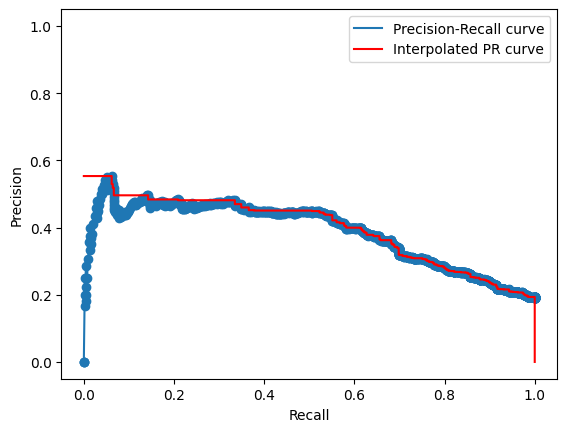

	Query 2


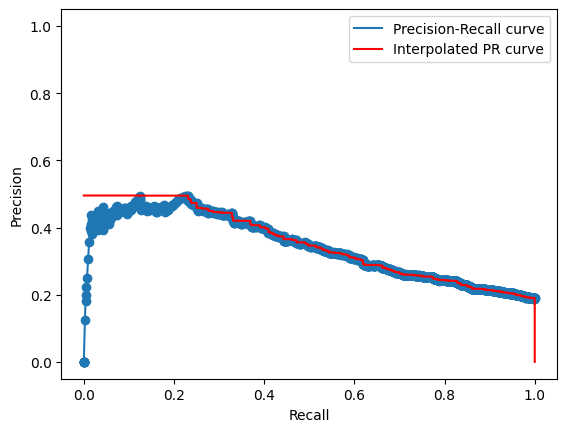

	Query 3


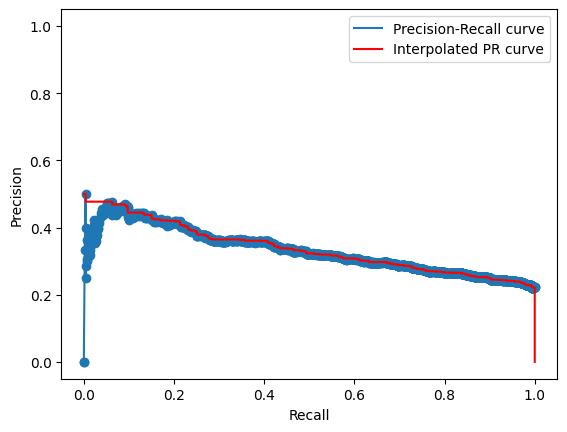

	Query 4


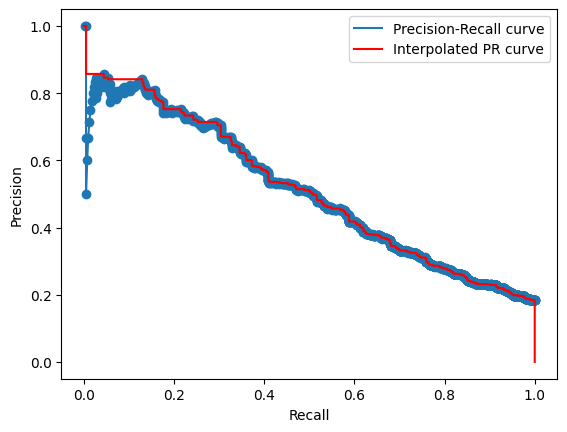

	Query 5


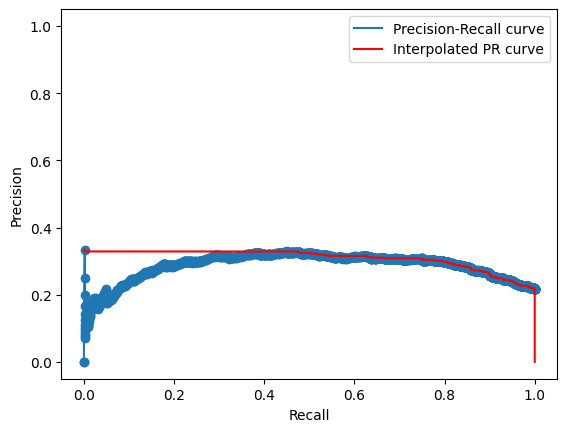

In [24]:
results, relevances = process_results(model, queries_max)
evaluate(method_1, results, relevances)

In [25]:
print("Method:", method_2)
evaluate(method_2, results, relevances, False)
print("Method:", method_3)
evaluate(method_3, results, relevances, False)

Method: r-prec



 Determine R-precision for each query
	Query 1
		Number of relevant documents: 421 --> P(421)=0.44
	Query 2
		Number of relevant documents: 420 --> P(420)=0.40
	Query 3
		Number of relevant documents: 493 --> P(493)=0.36
	Query 4
		Number of relevant documents: 408 --> P(408)=0.50
	Query 5
		Number of relevant documents: 483 --> P(483)=0.31
Method: map

 Calculate the Mean Average Precision
	Query 1
		AP=1/421 {P(4) + P(7) + P(12) + P(13) + P(14) + P(15) + P(19) + P(21) + P(22) + P(23) + P(24) + P(25) + P(29) + P(30) + P(31) + P(32) + P(33) + P(35) + P(36) + P(37) + P(39) + P(40) + P(44) + P(45) + P(46) + P(47) + P(51) + P(54) + P(63) + P(66) + P(68) + P(72) + P(73) + P(78) + P(79) + P(82) + P(84) + P(85) + P(88) + P(90) + P(91) + P(93) + P(94) + P(95) + P(96) + P(97) + P(99) + P(101) + P(104) + P(106) + P(107) + P(109) + P(110) + P(111) + P(114) + P(115) + P(117) + P(118) + P(119) + P(121) + P(127) + P(129) + P(136) + P(137) + P(138) + P(140) + P(142) + P(145) + P(146) + P(147) + P(1

# Test over two categories

We have 3 users:
1. Interested in Sport and Politics
2. Interested in Tech and Business
3. Interested in Sport and Entertainment

In [26]:
users = {1: "I am interested in Sport and Politics", 2: "I am interested in Tech and Business", 3: "I am interested in Sport and Entertainment"}

In [27]:
res = model.launch_query(users[1], k=10)

 1. [ Score = 0.373 ] Category politics |  ID: 671 | Text: uk youth  interested  in politics the majority of 
 2. [ Score = 0.329 ] Category tech |  ID: 1076 | Text: blog reading explodes in america americans are bec
 3. [ Score = 0.304 ] Category tech |  ID: 981 | Text: online games play with politics after bubbling und
 4. [ Score = 0.304 ] Category politics |  ID: 612 | Text: schools to take part in mock poll record numbers o
 5. [ Score = 0.304 ] Category politics |  ID: 1387 | Text: schools to take part in mock poll record numbers o
 6. [ Score = 0.295 ] Category tech |  ID: 1316 | Text: blogs take on the mainstream web logs or blogs are
 7. [ Score = 0.288 ] Category sport |  ID: 1800 | Text: teens  know little  of politics teenagers question
 8. [ Score = 0.287 ] Category politics |  ID: 777 | Text: lib dems target the student vote students can deci
 9. [ Score = 0.276 ] Category politics |  ID: 1964 | Text: student  inequality  exposed teenagers from well-o
 10. [ Score = 0.254

User 1: 
- $ P@5 = 3/5 $
- $P@10 = 6/10 $

In [28]:
res = model.launch_query(users[2], k=10)

 1. [ Score = 0.250 ] Category entertainment |  ID: 1653 | Text: ibm frees 500 software patents computer giant ibm 
 2. [ Score = 0.235 ] Category tech |  ID: 659 | Text: us top of supercomputing charts the us has pushed 
 3. [ Score = 0.229 ] Category politics |  ID: 835 | Text: student  fee factor  played down a rise has been r
 4. [ Score = 0.216 ] Category politics |  ID: 1734 | Text: go-ahead for new internet names the internet could
 5. [ Score = 0.213 ] Category business |  ID: 1249 | Text: aviation firms eye booming india india s defence m
 6. [ Score = 0.210 ] Category politics |  ID: 1964 | Text: student  inequality  exposed teenagers from well-o
 7. [ Score = 0.202 ] Category tech |  ID: 1080 | Text: progress on new internet domains by early 2005 the
 8. [ Score = 0.202 ] Category sport |  ID: 1790 | Text: progress on new internet domains by early 2005 the
 9. [ Score = 0.187 ] Category tech |  ID: 571 | Text: pc ownership to  double by 2010  the number of per
 10. [ Score =

User 2: 
- $ P@5 = 2/5 $
- $P@10 = 4/10 $

In [29]:
res = model.launch_query(users[3], k=10)

 1. [ Score = 0.250 ] Category tech |  ID: 1319 | Text: google launches tv search service the net search g
 2. [ Score = 0.230 ] Category entertainment |  ID: 900 | Text: new media battle for bafta awards the bbc leads th
 3. [ Score = 0.223 ] Category politics |  ID: 1964 | Text: student  inequality  exposed teenagers from well-o
 4. [ Score = 0.212 ] Category tech |  ID: 1076 | Text: blog reading explodes in america americans are bec
 5. [ Score = 0.199 ] Category sport |  ID: 1381 | Text: holmes feted with further honour double olympic ch
 6. [ Score = 0.197 ] Category tech |  ID: 144 | Text: broadband fuels online expression fast web access 
 7. [ Score = 0.192 ] Category politics |  ID: 1734 | Text: go-ahead for new internet names the internet could
 8. [ Score = 0.190 ] Category entertainment |  ID: 2048 | Text: games  deserve a place in class  computer games co
 9. [ Score = 0.189 ] Category business |  ID: 1567 | Text: voters flock to blog awards site voting is under w
 10. [ S

User 3: 
- $ P@5 = 2/5 $
- $P@10 = 3/10 $